In [145]:
## Identify fraud from Enron Email

### Enron became a symbol for fraud 
# The spectacular collapse of a giant american company in electric field was not only an end to the company
# but brought also a massive change for the american and global economy. 
# In 2001 Enron announced results for 3rd quarter and at the same time to a big surprise of shareholders a banckruptacy.
# In this project I'd like to focus on the most influencial workers of Enron which are obviously involved in the fraud.
# The most famous is CEO Jeffrey Keith "Jeff" Skilling and a chairman  Kenneth Lay of Enron 
# during most of the time when the crime occured.
# We will see their salaries, bonuses and stocks which are quite interesting.
# 

# Going through given dataset with e-mails within Enron co-workers we will discover a POI - Person of Interest,
# basically a person suspected to participate in the fraud.
# 


In [271]:
# Firstly, let's load the necessary data and packages. 
# I am going to create a dataframe in pandas and then with the use of numpy arrays and matplotlib visualize it.
# To further analysis in classyfing will need Sklearn, GaussianNB,... i co jeszcze?

import sys
import pickle
sys.path.append("../tools/")
import random

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.grid_search import GridSearchCV
from time import time

import pandas as pd
get_ipython().magic(u'matplotlib inline')
from matplotlib import pyplot as plt


### Let's load my dictionary providede by Udacity
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [272]:
# Let's check the type of my dataset, as we see it's a dictionary
type(data_dict)

dict

In [273]:
# By converting the dictionary to a dataframe with pandas it will be easier and faster to work with it:
enron_dataf = pd.DataFrame.from_records(list(data_dict.values()))


In [274]:
# Previosly the index were numbers, but it's easier to set them as names of employees series:
employees = pd.Series(list(data_dict.keys()))
enron_dataf.set_index(employees, inplace=True)
enron_dataf.head()

# to tez zmien to co on napisal
# Coerce numeric values into floats or ints; also change NaN to zero:
enron_dataf = enron_dataf.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0)
enron_dataf.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000.0,0.0,0.0,0.0,0.0,0.0,94299.0,29.0,38.0,1.0,...,0.0,1740.0,False,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
ELLIOTT STEVEN,350000.0,0.0,-400729.0,0.0,0.0,4890344.0,78552.0,0.0,0.0,0.0,...,0.0,12961.0,False,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
CORDES WILLIAM R,0.0,0.0,0.0,0.0,0.0,651850.0,0.0,12.0,10.0,0.0,...,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
HANNON KEVIN P,1500000.0,0.0,-3117011.0,0.0,0.0,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0


In [275]:
# Let's load the data and answer a few simple questions:

In [276]:
# Here we see the whole data_set

In [277]:
# Let's see what features we have about the Enron's CEO:

enron_dataf.loc['SKILLING JEFFREY K']

bonus                            5.6e+06
deferral_payments                      0
deferred_income                        0
director_fees                          0
email_address                          0
exercised_stock_options        1.925e+07
expenses                           29336
from_messages                        108
from_poi_to_this_person               88
from_this_person_to_poi               30
loan_advances                          0
long_term_incentive             1.92e+06
other                              22122
poi                                 True
restricted_stock             6.84367e+06
restricted_stock_deferred              0
salary                       1.11126e+06
shared_receipt_with_poi             2042
to_messages                         3627
total_payments               8.68272e+06
total_stock_value            2.60937e+07
Name: SKILLING JEFFREY K, dtype: object

In [278]:
print enron_dataf.keys()

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')


In [279]:
# As we see there are 146 people in our dataset. Only 18 of them are POI  - Persons of Interest
enron_dataf['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [280]:
## OUTLIERS
##


In [281]:
# to nie działa trzeba cos z tym zrobić

In [282]:
#chyba dam sobie z tym spokój
#enron_dataf.drop['TOTAL', axis = 0, inplace = True]

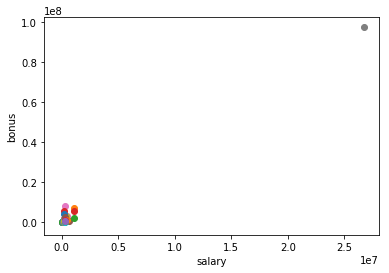

In [283]:
## Can I stay with this plot below? or if it is related to the diciotnary from before shall I removei it?

# We should check our data if it's clean enough to proceed with classfieres, that's the base for good analysis
# Let's focus on earning of employees, by making  a plot of salaries and bonus:

data_features = ["salary", "bonus"]

data = featureFormat(data_dict, data_features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [284]:
# Just by reading the file with emails provided by Udacity we see that 'TOTAL' and 'NAN' values bring confusion 
# to the data. Let's remove it.

In [285]:
## This code below doesn't make sense after removing the dictionary : d_enron_dict = pickle.load(open("final_project_dataset.pkl", "r") )
## What am I supposed to do with this?

# As we can see there are some outliers that must be removed for further analysis.
# let's get rid off the total, which could cause a chaos. 
# After that we should remove all NANs and see the 6 top salaries as a list in Enron.


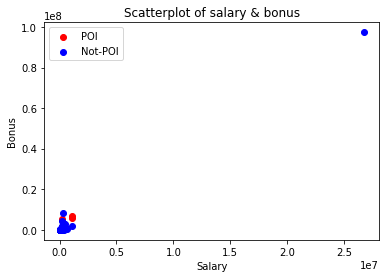

In [286]:
# Let's visualize the salaries and bonuses of ppl in enrone,that's a good way to find outliers

plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == True],enron_dataf["bonus"][enron_dataf["poi"] == True], color = 'r',
           label = "POI")
plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == False],enron_dataf["bonus"][enron_dataf["poi"] == False],color = 'b',
           label = "Not-POI")
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary & bonus")
plt.legend(loc='upper left')
plt.show() 

In [287]:
## So I removed the NaN values too, it's another outlier. Does it have to be visualized aswell?

# Removing the NaN values:
enron_dataf.replace(to_replace= 'NaN', value= 0,inplace=True)

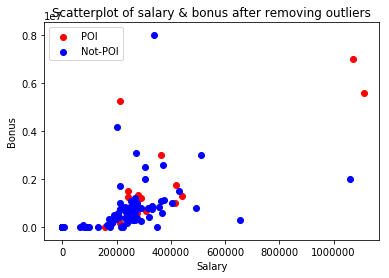

In [288]:
# Now let't eliminate the 'Total' counts!
# The plot brought a more comprehensive view


enron_dataf.drop('TOTAL', axis = 0, inplace = True)

plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == True],enron_dataf["bonus"][enron_dataf["poi"] == True], color = 'r',
           label = "POI")
plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == False],enron_dataf["bonus"][enron_dataf["poi"] == False],color = 'b',
           label = "Not-POI")
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary & bonus after removing outliers")
plt.legend(loc='upper left')
plt.show() 


In [289]:
#clean all 'inf' values which we got if the person's from_messages = 0 o co z tym chodzi?

In [290]:
#enron_df_new = enron_df_new.replace('inf', 0) enron_df_new = enron_df_new.fillna(0)

In [291]:
#### FEATURES
#2. Feature processing of the dataset about ENRON

In [292]:
## My features still don't work :(

# Created two new features in ratios:
enron_dataf['new_feature_from_meassages_to_poi_ratio'] = enron_dataf['from_messages']/enron_dataf['from_poi_to_this_person']
enron_dataf['new_feature_to_messages_from_this_person_to_poi_ratio'] = enron_dataf['to_messages']/enron_dataf['from_this_person_to_poi']

In [293]:
#add our new features to the features list
features_list.append('new_feature_from_meassages_to_poi_ratio')
features_list.append('new_feature_to_messages_from_this_person_to_poi_ratio')

In [294]:
## So I removed the NaN values too, it's another outlier. Does it have to be visualized aswell? pozmieniaj to kobitko

# Removing the NaN values:
enron_dataf.replace(to_replace= "NaN", value= 0,inplace=True)

In [295]:
enron_dataf = enron_dataf.fillna(0)

In [296]:
enron_dataf = enron_dataf.replace('inf', 0)

In [297]:
enron_dataf = enron_dataf.astype(np.float64)

In [298]:

# Converting the above modified dataframe to a dictionary
enron_dict = enron_dataf.to_dict('index')

In [299]:
# To make it easier with further exploration let's set my dataset to a dataset
# MY DATASET czy co to ma byc?
my_dataset = enron_dict

In [300]:
# enron_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [301]:
# Now let's focus on choosing the features to indentify a POI
# I will use only the provided features, POI, financial and email as per below:

# POI

# Features with email: 'from_messages', 'shared_receipt_with_poi',['fraction_mail_from_poi', 'fraction_mail_to_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'from_messages']

# Financial features: ['poi', 'salary', 'bonus','deferral_payments', 'expenses', 
#                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','total_payments',
#                 'exercised_stock_options', 'total_stock_value', 'restricted_stock']


In [302]:
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'expenses', 
                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','total_payments',
                 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 
                 'from_messages', 'shared_receipt_with_poi', 'exercised_stock_options',
                'total_stock_value', 'restricted_stock', 'new_feature_from_meassages_to_poi_ratio', 
                'new_feature_to_messages_from_this_person_to_poi_ratio']

In [303]:
#data_dict = pickle.load(open("my_dataset.pkl", "r") )

In [304]:
data = featureFormat(new_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [305]:
# zmien to tez prosze
# I mus split data into training and testing datasets to run classifiers

from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.3, 
                                                                                             random_state=42)


In [306]:
## I don't understand why, but yesterday it was all working! Could it be because of the dataframe instead of diciotnary?

from sklearn.naive_bayes import GaussianNB

t0 = time()
#zobacz czy mozna zmienic nazwe tego accuracy score i skad sie to wzielo
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
accuracy = accuracy_score(labels_test, prediction)


print "Accuracy for GaussianNB:", accuracy

print "GaussianNB time of running algorithm:", round(time()-t0, 3), "s"

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [307]:
## I don't understand why, but yesterday it was all working! Could it be because of the dataframe instead of diciotnary?

# Another classifer is a Decision Tree,
# it gives certainly bigger accuracy


from sklearn.tree import DecisionTreeClassifier
# jak cos to to teraz dodalam wieczorem
from sklearn.metrics import accuracy_score

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [308]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(features_train, labels_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [309]:
## I don't understand why, but yesterday it was all working! Could it be because of the dataframe instead of diciotnary?

from sklearn.neighbors import KNeighborsClassifier


clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print "testing time: ", round(time()-t0, 3), "s"
print "Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [310]:

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print "testing time: ", round(time()-t0, 3), "s"

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [311]:
##Accuracy can be interpreted as : 85.2% predictions on the total test set have been made correctly.

#Precision can be interpreted as : if a person is being classified as a POI by my classifier then there is a 47.6% chance that the person is actually a POI. (i.e., a 47.6% chance of obtaining a true positive condition.)

#Recall can be interpreted as : of all the actual POIs considered, 37.7% of all the POIs can be classified correctly as a POI by my classifier.



In [312]:
# Create final classifer/ czy to mialoby sens?
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_features=2, min_samples_split=2,
                             criterion='entropy', max_depth=None)

In [313]:
# to bylo po prostu to 
dump_classifier_and_data(clf, my_dataset, features_list)

In [314]:
# With 146 Enron employers, 18 of which are POIs, the dataset used is both small and is imbalanced. zmien to jakos